# praktikum minggu ke 1

## praktik 1 memahami ukuran dalam gambar

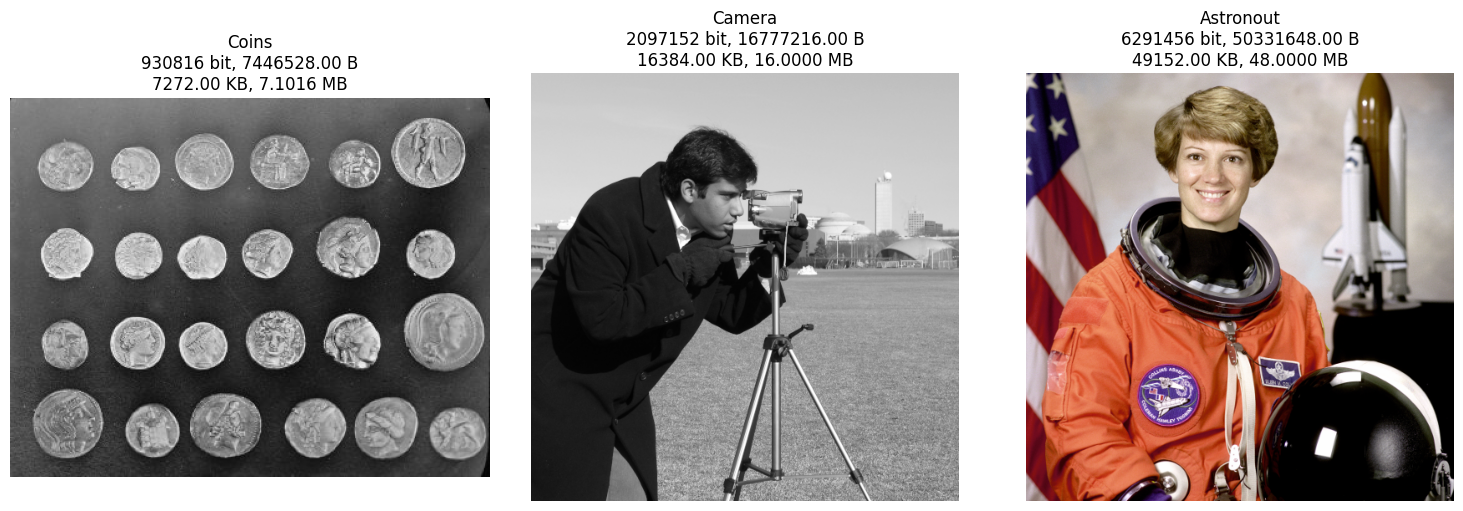

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

#mengambil gambar dari scikit image
coins_img = data.coins()
camera_img = data.camera()
astronout_img = data.astronaut()

#membuat fungsi hitung ukuran
def hitung_ukuran(image):
    bit_per_pixel = 8 if len(image.shape) == 2 else 24 #8 bit unuk grayscale, 25 untuk rgb
    total_pixel = image.shape[0] * image.shape[1]
    total_bit = total_pixel * bit_per_pixel
    total_byte = total_bit * 8
    total_kb = total_byte / 1024
    total_mb = total_kb / 1024
    return total_bit, total_byte, total_kb, total_mb

#menyusun gambar dan size dalam satu baris
fig, axes = plt.subplots(1, 3, figsize=(15,5))

#list gambar dan nama yang akan diolah
gambar_list = [coins_img, camera_img, astronout_img]
nama_list = ["Coins", "Camera", "Astronout"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
    bits, bytes_, kb, mb = hitung_ukuran(img)
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
    ax.axis('off')

plt.tight_layout()
plt.show()

## praktik 2 memahami gambar yang terdiri dari beberapa pixel (mengambil salah satu pixel dari satu gambar)

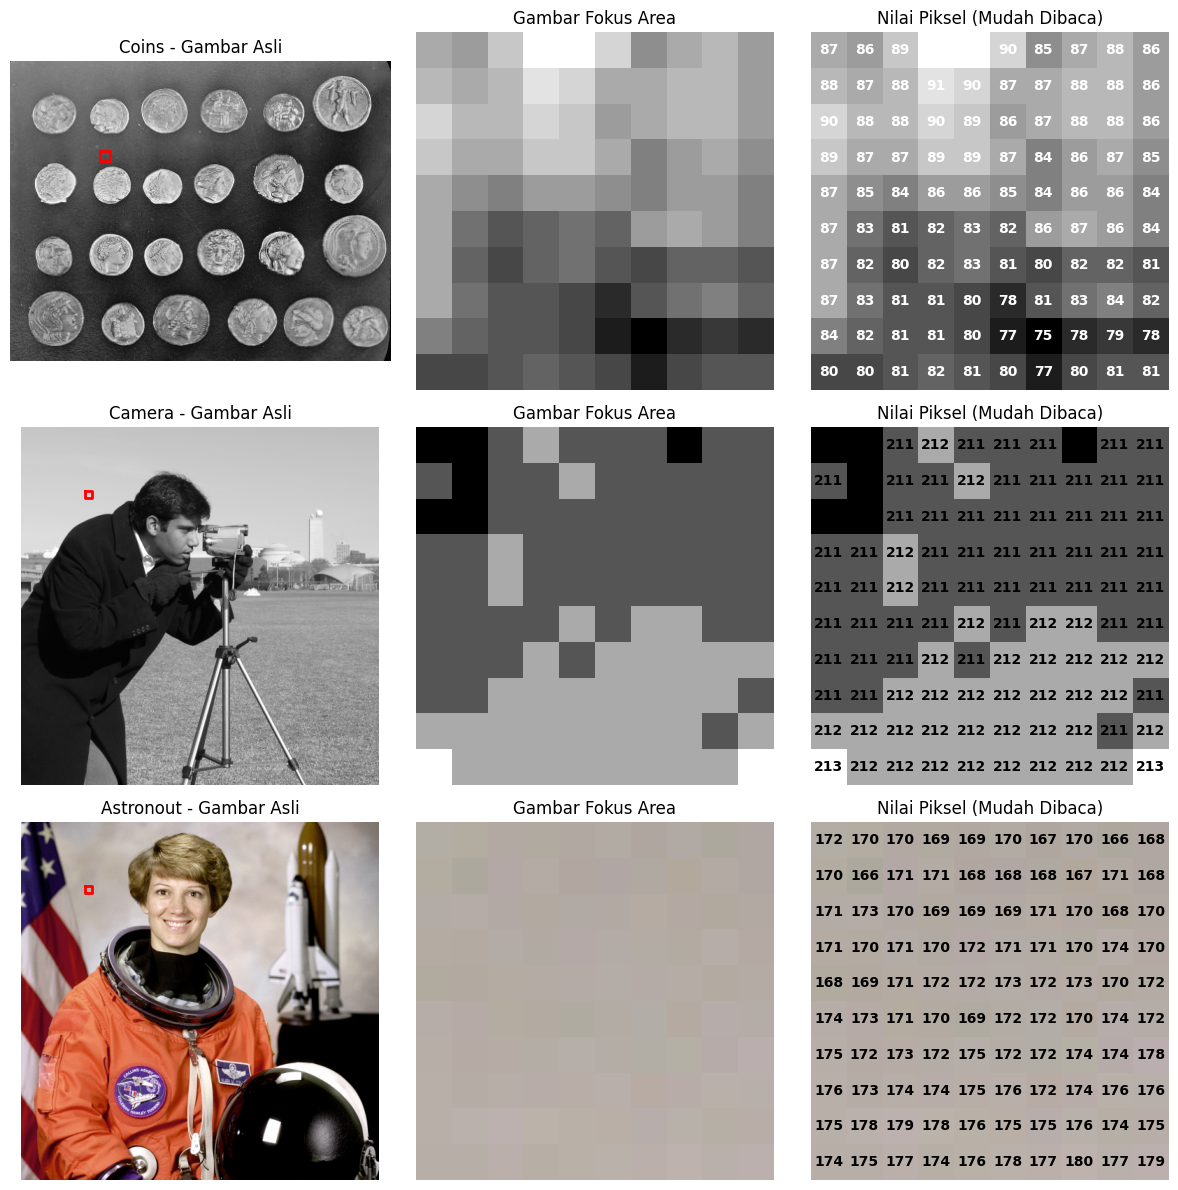

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

#koordinat gambar yang akan diambil
x_start, x_end = 90, 100
y_start, y_end = 90, 100

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
    # Menampilkan gambar asli
    axes[i, 0].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    axes[i, 0].set_title(f"{nama} - Gambar Asli")
    axes[i, 0].axis('off')

    # Menambahkan kotak merah untuk menunjukkan area yang difokuskan
    rect_x = [x_start, x_end, x_end, x_start, x_start]
    rect_y = [y_start, y_start, y_end, y_end, y_start]
    axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

    # Menampilkan gambar fokus area
    zoomed_img = img[y_start:y_end, x_start:x_end]
    axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
    axes[i, 1].set_title("Gambar Fokus Area")
    axes[i, 1].axis('off')

    # Menampilkan nilai piksel dalam area yang di-zoom
    axes[i, 2].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

    for y in range(zoomed_img.shape[0]):
        for x in range(zoomed_img.shape[1]):
            if len(img.shape) == 3:  # Jika gambar RGB, gunakan rata-rata nilai kanal
                pixel_value = np.mean(zoomed_img[y, x]).astype(int)
            else:
                pixel_value = zoomed_img[y, x]

            # Pilih warna teks agar mudah dibaca pada gambar
            text_color = "white" if pixel_value < 128 else "black"
            axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center', fontsize=10, fontweight='bold')

    axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


## praktik 3 memahami gambar yang yang disimpan dalam array untuk mempermudah mnipulasi dan pemrosesan


 === Coins ===
Tipe data: <class 'numpy.ndarray'>
Dimensi: (303, 384)
Tipe nilai pixel: uint8
Contoh nilai dengan pixel 5x5 pertama: 
[[ 47 123 133 129 137]
 [ 93 144 145 143 145]
 [126 147 143 147 145]
 [131 136 133 139 136]
 [131 133 134 135 129]]

 === Camera ===
Tipe data: <class 'numpy.ndarray'>
Dimensi: (512, 512)
Tipe nilai pixel: uint8
Contoh nilai dengan pixel 5x5 pertama: 
[[200 200 200 200 199]
 [200 199 199 200 199]
 [199 199 199 200 200]
 [200 200 199 199 199]
 [200 200 200 200 199]]

 === Astronout ===
Tipe data: <class 'numpy.ndarray'>
Dimensi: (512, 512, 3)
Tipe nilai pixel: uint8
Contoh nilai dengan pixel 5x5 pertama: 
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  [ 54  51  98]
  [ 76  76 106]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  [106 107 120]
  [128 128 131]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  [159 157 157]
  [167 165 161]]

 [[220 213 210]
  [214 206 206]
  [202 198 196]
  [197 191 193]
  [200 194 196]]

 [[232 223 223]
  [226 220 

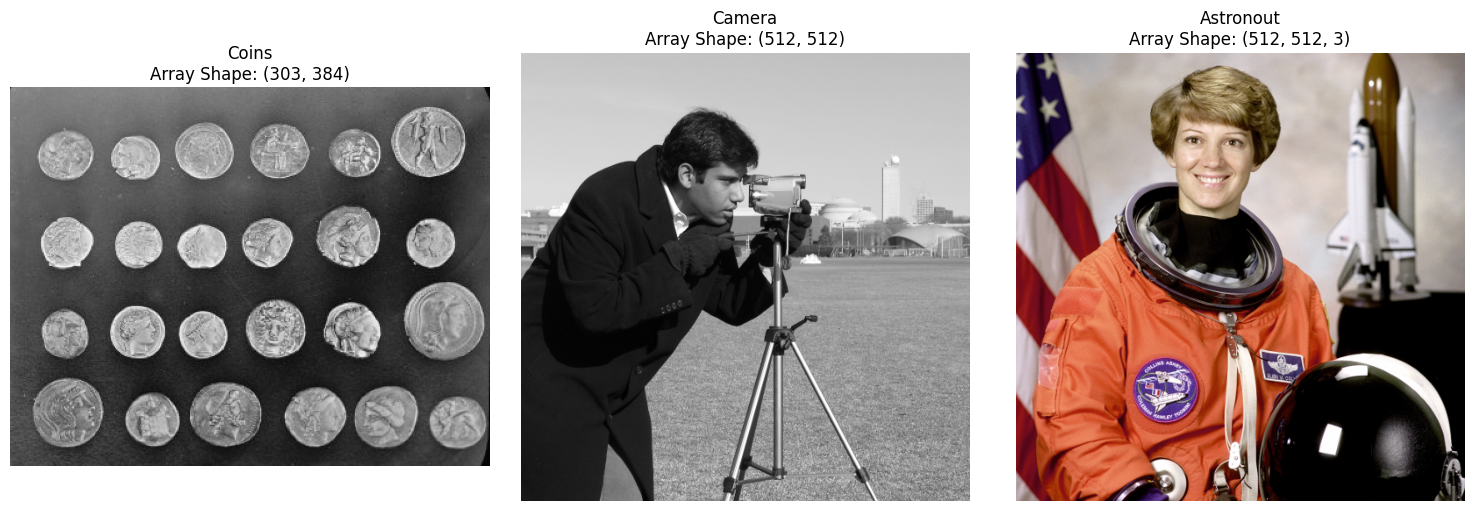

In [6]:
def info_array(image, nama):
    print(f"\n === {nama} ===")
    print(f"Tipe data: {type(image)}") #akan menampikan tipe 'numpy.ndarray'
    print(f"Dimensi: {image.shape}") #akan menampikan dimensi gambar (n,n,n(jika rgb))
    print(f"Tipe nilai pixel: {image.dtype}") #akan menampikan tipe data
    print("Contoh nilai dengan pixel 5x5 pertama: ") 
    print(image[:5, :5] if len(image.shape) == 2 else image[:5, :5, :]) #akan menampilkan jumlah pixel sesuai gambar grayscale atau rgb
    
info_array(coins_img, nama_list[0]) 
info_array(camera_img, nama_list[1]) 
info_array(astronout_img, nama_list[2]) 

#visualisasi
fig, axes = plt.subplots(1, 3, figsize=(15,5))    

for ax, img, nama in zip(axes, gambar_list, nama_list):
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(f"{nama}\nArray Shape: {img.shape}")
    ax.axis('off')

plt.tight_layout()
plt.show()
